Fake news detection using Machine Learning


In [40]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('fake_or_real_news.csv')

In [42]:
df.shape

(6335, 4)

In [43]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [44]:
df=df.set_index('Unnamed: 0')

In [45]:
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [46]:
y = df.label

In [47]:
df = df.drop('label', axis=1)

# Classification

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [49]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)


In [50]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [51]:
#tfidf_vectorizer.get_feature_names()[-10:]
tfidf_vectorizer.get_feature_names_out()[-10:]

array(['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى',
       'ยงade'], dtype=object)

In [52]:
count_vectorizer.get_feature_names_out()[:10]

array(['00', '000', '0000', '00000031', '000035', '00006', '0001',
       '0001pt', '000ft', '000km'], dtype=object)

In [18]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names_out())

In [19]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names_out())

In [20]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [21]:
print(count_df.equals(tfidf_df))

False


In [22]:
count_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
tfidf_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(random_state=150)

accuracy:   0.898
Confusion matrix, without normalization


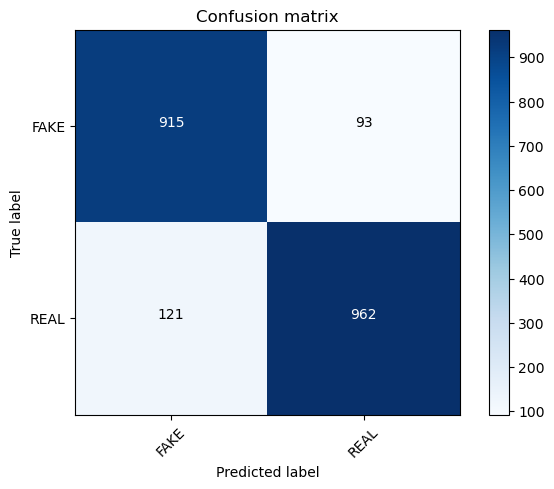

In [26]:
random.fit(tfidf_train, y_train)
pred=random.predict(tfidf_test)
#print(pred)
score1=metrics.accuracy_score(y_test,pred)
print("accuracy:   %0.3f" % score1)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [27]:
clf = MultinomialNB()

['REAL' 'REAL' 'REAL' ... 'REAL' 'FAKE' 'REAL']
accuracy:   0.857
Confusion matrix, without normalization


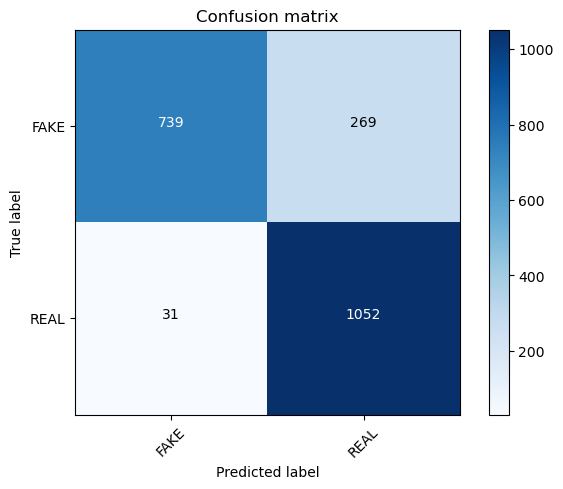

In [28]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
print(pred)
score2 = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score2)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [29]:
clf = MultinomialNB()

accuracy:   0.893
Confusion matrix, without normalization


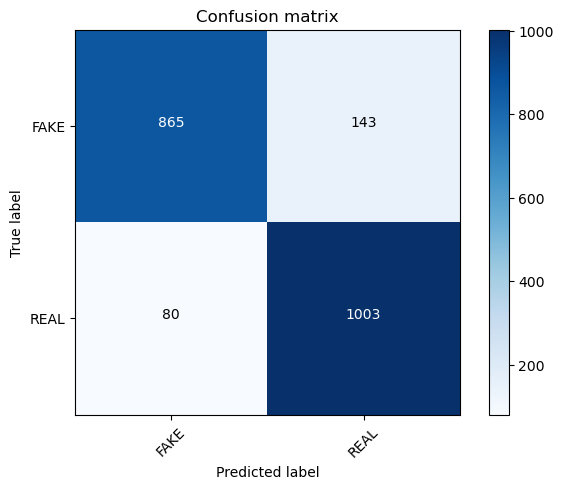

In [30]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score3 = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score3)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [31]:
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.935
Confusion matrix, without normalization


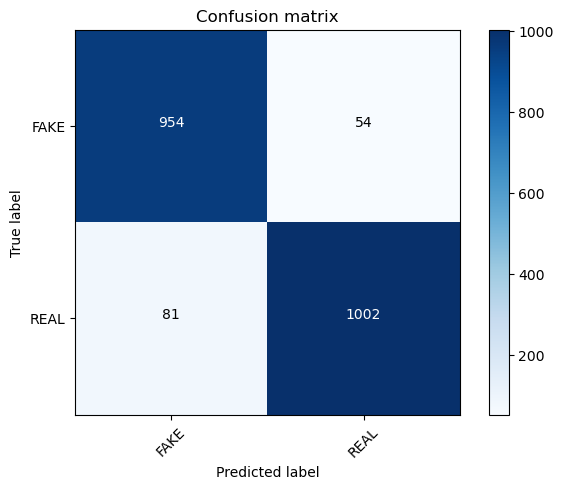

In [32]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score4 = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score4)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [33]:
clf = MultinomialNB(alpha=0.1)

In [34]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.88140
Alpha: 0.10 Score: 0.89766
Alpha: 0.20 Score: 0.89383
Alpha: 0.30 Score: 0.89000
Alpha: 0.40 Score: 0.88570
Alpha: 0.50 Score: 0.88427
Alpha: 0.60 Score: 0.87470
Alpha: 0.70 Score: 0.87040
Alpha: 0.80 Score: 0.86609
Alpha: 0.90 Score: 0.85892


C:\Users\public\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [35]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472

    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names_out()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -5.0499738290007254 2016
FAKE -4.11678041272139 hillary
FAKE -3.919627032163375 october
FAKE -3.2927108193334518 share
FAKE -3.025706147833974 article
FAKE -3.0160379551052277 november
FAKE -2.481692977960674 print
FAKE -2.419878273792482 source
FAKE -2.374550203968108 email
FAKE -2.360271941683823 oct
FAKE -2.296198492309078 war
FAKE -2.229057989338063 advertisement
FAKE -2.1835387068622434 election
FAKE -2.066732189211257 establishment
FAKE -2.051049682737099 podesta
FAKE -2.0256132107944613 nov
FAKE -2.0068549198762393 mosul
FAKE -1.9618632694908698 snip
FAKE -1.9373987538007391 wikileaks
FAKE -1.9220219108321817 corporate
FAKE -1.8532057751961597 jewish
FAKE -1.7796993002479582 com
FAKE -1.7137253878178798 photo
FAKE -1.6909124862154297 26
FAKE -1.6902886149177516 donald
FAKE -1.6851850380253395 pipeline
FAKE -1.6803990758879466 ayotte
FAKE -1.6423077634464522 mainstream
FAKE -1.6111699904146717 reuters
FAKE -1.5891119995772933 entire

REAL 4.801353676463441 said
REAL 2.661452

In [36]:
feature_names = tfidf_vectorizer.get_feature_names_out()

In [37]:
### Most real
#sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

In [38]:
### Most fake
#sorted(zip(clf.coef_[0], feature_names))[:20]

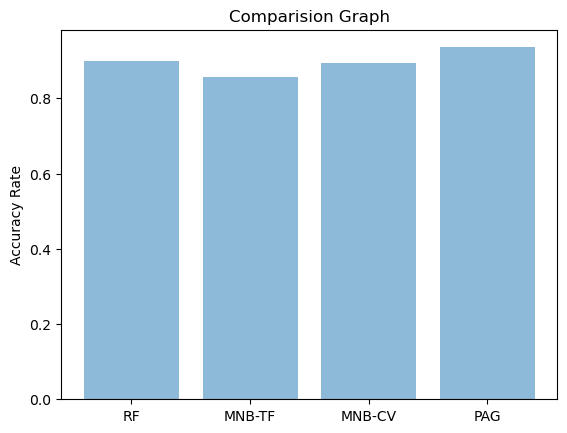

In [39]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('RF','MNB-TF','MNB-CV','PAG')
y_pos = np.arange(len(objects))
performance = [score1,score2,score3,score4]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Rate')
plt.title('Comparision Graph')

plt.show()